# Predicting Car Prices Using K-Nearest Neighbor Algorithm

    This project is from DataQuest for practice.

    data set source: https://archive.ics.uci.edu/ml/datasets/automobile

In [26]:
#Read in the data set

import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

column_names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data', names = column_names)

# Preview
cars.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
# Select which columns are numeric because non-numerical data can't be analyzed 
numerical_values_cols = ['symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
numeric_cars = cars[numerical_values_cols]

In [4]:
# Data cleaning processing
numeric_cars = numeric_cars.replace('?', np.nan)

numeric_cars.head(10)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,NaN


In [5]:
# Count number of missing data of every columns
print(numeric_cars.isnull().sum())
print('-'*30)
print('Number of rows:', numeric_cars.shape[0])

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
------------------------------
Number of rows: 205


In [6]:
# Remove any rows with missing 'price' values
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

symboling             0
normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [7]:
# Convert data type of the data set (numeric_cars) to float and fill all null values with average of each colums 

numeric_cars = numeric_cars.astype('float')
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

numeric_cars.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
# Normalize all columnns to range from 0 to 1 except the target column(price).
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head(20)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.8,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.6,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.6,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.8,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


In [11]:
#Implement k-nearest neighbors model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_name, data_set):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data_set.index)
    random_df = data_set.reindex(shuffled_index)
    
    data_set_half_row_num = int(len(random_df) / 2)
    
    #Splitting data set to train set and test set 
    train_set = random_df[0:data_set_half_row_num]
    test_set = random_df[data_set_half_row_num:]
    
    #Perform KNN
    knn = KNeighborsRegressor()
    knn.fit(data_set[[training_col]], data_set[target_name])
    predicted_price = knn.predict(test_set[[training_col]])
    
    mse = mean_squared_error(test_set[target_name], predicted_price)
    
    # Calculate and return RMSE.
    rmse = np.sqrt(mse)
    return rmse


train_cols = numeric_cars.columns.drop('price')

rems_results = {}

for column in train_cols:
    rmse = knn_train_test(column, 'price', numeric_cars)
    rems_results[column] = rmse

rems_results_series = pd.Series(rems_results)

sorted_rems_results = rems_results_series.sort_values()

sorted_rems_results

engine_size          2437.366198
horsepower           3076.672765
width                3722.839779
curb_weight          3935.486239
highway_mpg          3978.921050
wheel_base           4127.984014
length               4216.567603
city_mpg             4310.072165
compression_ratio    5877.502846
bore                 6060.116969
normalized_losses    6333.566283
height               6537.663831
stroke               7060.767990
peak_rpm             7584.616744
symboling            8101.386348
dtype: float64

In [12]:
#Modify function knn_train_test to accept a parameter for the k value.

def knn_train_test(training_col, target_name, data_set):

    np.random.seed(2)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data_set.index)
    random_df = data_set.reindex(shuffled_index)
    
    data_set_half_row_num = int(len(random_df) / 2)
    
    #Splitting data set to train set and test set 
    train_set = random_df[0:data_set_half_row_num]
    test_set = random_df[data_set_half_row_num:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {}
    
    for k in k_values:
        
        #Perform KNN
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(data_set[[training_col]], data_set[target_name])
        predicted_price = knn.predict(test_set[[training_col]])

        mse = mean_squared_error(test_set[target_name], predicted_price)

        # Calculate and return RMSE.
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
        
    return k_rmse

train_cols = numeric_cars.columns.drop('price')
k_rmse_results = {}

for column in train_cols:
    rmse = knn_train_test(column, 'price', numeric_cars)
    k_rmse_results[column] = rmse
    
k_rmse_results

{'bore': {1: 7108.1396119219735,
  3: 5907.54525552658,
  5: 6140.923274280021,
  7: 6226.922167243174,
  9: 6496.733613726234},
 'city_mpg': {1: 5556.295655015182,
  3: 4824.0868254696625,
  5: 4851.856182395915,
  7: 4806.713345214928,
  9: 4501.701654400709},
 'compression_ratio': {1: 6103.155264141477,
  3: 6328.873501989151,
  5: 6765.148319859882,
  7: 6726.003000647572,
  9: 6797.242503365159},
 'curb_weight': {1: 382.39248149119,
  3: 3331.123683293573,
  5: 4019.8673039032146,
  7: 3997.623176744539,
  9: 4030.0608589183853},
 'engine_size': {1: 2707.5005846428885,
  3: 2506.2222018353636,
  5: 2464.6226653133413,
  7: 2655.403776643684,
  9: 2963.497967008665},
 'height': {1: 8422.33359280638,
  3: 8031.321368087056,
  5: 7300.151565983862,
  7: 6918.8669135449445,
  9: 7109.985865678317},
 'highway_mpg': {1: 4998.068301111366,
  3: 4620.868771629472,
  5: 4124.182543568272,
  7: 4027.370478476398,
  9: 4094.57019373034},
 'horsepower': {1: 3144.9783625631035,
  3: 2899.10734

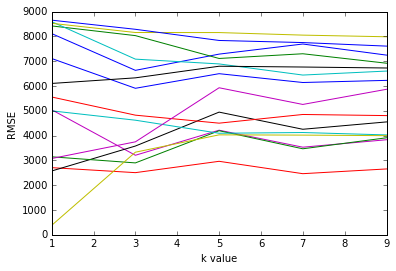

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in k_rmse_results.items():

    x_axis = list(value.keys())
    x_axis = sorted(x_axis)    
    y_axis = list(value.values())
    plt.plot(x_axis, y_axis)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [14]:
# Compute average RMSE across different 'k' values for each feature
feature_average_rmse = {}

for key, values in k_rmse_results.items():
    average_rmse = np.mean(list(values.values()))
    feature_average_rmse[key] = average_rmse

series_avg_rmse = pd.Series(feature_average_rmse)
series_avg_rmse.sort_values()

engine_size          2659.449439
curb_weight          3152.213501
horsepower           3524.296049
width                3966.472454
length               3981.287408
highway_mpg          4373.012058
wheel_base           4775.506821
city_mpg             4908.130732
bore                 6376.052785
compression_ratio    6544.084518
normalized_losses    7122.020453
stroke               7393.593947
height               7556.531861
symboling            8027.341008
peak_rpm             8175.369412
dtype: float64

In [15]:
#find best feature column combination based on output result of last code block

def knn_train_test(train_cols_list, target_name, data_set):

    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data_set.index)
    random_df = data_set.reindex(shuffled_index)
    
    data_set_half_row_num = int(len(random_df) / 2)
    
    #Splitting data set to train set and test set 
    train_set = random_df[0:data_set_half_row_num]
    test_set = random_df[data_set_half_row_num:]
    
    #Perform KNN
    knn = KNeighborsRegressor()
    knn.fit(data_set[train_cols_list], data_set[target_name])
    predicted_price = knn.predict(test_set[train_cols_list])

    mse = mean_squared_error(test_set[target_name], predicted_price)

    # Calculate and return RMSE.
    rmse = np.sqrt(mse)
        
    return rmse

k_rmse_results = {}

best_2_features = ['engine_size','curb_weight']
best_3_features = ['engine_size','curb_weight','horsepower']
best_4_features = ['engine_size','curb_weight','horsepower', 'width']
best_5_features = ['engine_size','curb_weight','horsepower', 'width', 'length']
best_6_features = ['engine_size','curb_weight','horsepower', 'width', 'length', 'highway_mpg']


rmse = knn_train_test(best_2_features, 'price', numeric_cars)
k_rmse_results['best_2_features'] = rmse

rmse = knn_train_test(best_3_features, 'price', numeric_cars)
k_rmse_results['best_3_features'] = rmse

rmse = knn_train_test(best_4_features, 'price', numeric_cars)
k_rmse_results['best_4_features'] = rmse

rmse = knn_train_test(best_5_features, 'price', numeric_cars)
k_rmse_results['best_5_features'] = rmse

rmse = knn_train_test(best_6_features, 'price', numeric_cars)
k_rmse_results['best_6_features'] = rmse

k_rmse_results

{'best_2_features': 2541.6269559025172,
 'best_3_features': 2369.3459218581283,
 'best_4_features': 2423.7798053764072,
 'best_5_features': 2476.3525857819423,
 'best_6_features': 2451.6558123395334}

In [16]:
# vary k value to find out the hyperparameter

def knn_train_test(train_cols_list, target_name, data_set):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data_set.index)
    random_df = data_set.reindex(shuffled_index)
    
    data_set_half_row_num = int(len(random_df) / 2)
    
    #Splitting data set to train set and test set 
    train_set = random_df[0:data_set_half_row_num]
    test_set = random_df[data_set_half_row_num:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        #Perform KNN
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(data_set[train_cols_list], data_set[target_name])
        predicted_price = knn.predict(test_set[train_cols_list])

        mse = mean_squared_error(test_set[target_name], predicted_price)

        # Calculate and return RMSE.
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# Retain best feature combination from last code block
best_2_features = ['engine_size','curb_weight']
best_3_features = ['engine_size','curb_weight','horsepower']
best_4_features = ['engine_size','curb_weight','horsepower', 'width']

rmses = knn_train_test(best_2_features, 'price', numeric_cars)
k_rmse_results['best_2_features'] = rmses

rmses = knn_train_test(best_3_features, 'price', numeric_cars)
k_rmse_results['best_3_features'] = rmses

rmses = knn_train_test(best_4_features, 'price', numeric_cars)
k_rmse_results['best_4_features'] = rmses

k_rmse_results

{'best_2_features': {1: 355.53703626825694,
  2: 1373.1680081886816,
  3: 1869.4769598500916,
  4: 2152.246762682023,
  5: 2541.6269559025172,
  6: 2709.2513389600394,
  7: 2870.634159673183,
  8: 2985.7671522782484,
  9: 2997.191670533137,
  10: 3122.875626456621,
  11: 3231.9545186776813,
  12: 3304.053688559545,
  13: 3314.2343141087636,
  14: 3393.75580155586,
  15: 3509.53438588662,
  16: 3582.281756344393,
  17: 3668.7174932657076,
  18: 3830.0696939481313,
  19: 3941.062459934081,
  20: 4020.469256326226,
  21: 4090.5424737582057,
  22: 4127.126893862648,
  23: 4125.280007293618,
  24: 4160.014268789542},
 'best_3_features': {1: 342.76776770031546,
  2: 1221.8709207726088,
  3: 1807.4395339448804,
  4: 2172.582131660822,
  5: 2369.3459218581283,
  6: 2666.608940484927,
  7: 2906.448274272991,
  8: 2838.7871802414093,
  9: 2968.13394607921,
  10: 2943.2194085610904,
  11: 3104.8589115002305,
  12: 3279.166334673158,
  13: 3403.775634382949,
  14: 3515.2388311691752,
  15: 3584.34

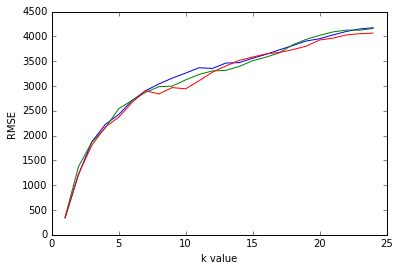

In [17]:
for k, v in k_rmse_results.items():
    
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def knn_model_accracy(training_col, target_name, data_set):

    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data_set.index)
    random_df = data_set.reindex(shuffled_index)
    
    data_set_half_row_num = int(len(random_df) / 2)
    
    #Splitting data set to train set and test set 
    train_set = random_df[0:data_set_half_row_num]
    test_set = random_df[data_set_half_row_num:]
    
        
    #Perform KNN
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(data_set[training_col], data_set[target_name])
    predicted_price = knn.predict(test_set[training_col])
    
    accuracy = (1 - abs(predicted_price - test_set['price']) / predicted_price) * 100
    
    return accuracy

each_accuracy = knn_model_accracy(best_3_features, 'price', numeric_cars)
accuracy = np.mean(each_accuracy)

accuracy

99.40947058629881

# The best combination of k value and feature columns:
    (1) Best feature columns:'engine_size', 'curb_weight', 'horsepower'
    (2) K value: 1
    (3) Model accuracy: 99.41%